In [38]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [39]:


#random tensor following normal distribution of shape (4,6)
a = tf.random.normal(shape=(4,6), mean=0, stddev=1)

#reshaping the tensor to (2,3,4)
a_rs = tf.reshape(a, (2,3,4))
#transposing the tensor to (3,2,4) using the perm parameter
a_T = tf.transpose(a_rs, perm=[1, 0, 2])

#declaring a large and small tensor
largeTensor = tf.random.normal((4,4), mean=0, stddev=1)
smallTensor = tf.random.normal((1,4), mean=0, stddev=1)

#broadcasting the small tensor to match the large tensor
smallTensorBroadcast = tf.tile(smallTensor, multiples=[4,1])
# adding the small and large tensors
broadcastAdd = largeTensor + smallTensor



print(f"1. shape of random tensor (a): {a.shape}, rank: {tf.rank(a).numpy()}" )
print(f"2. shape of random tensor (a transpose): {a_T.shape}, rank: {tf.rank(a_T).numpy()}" )
print(f"3. shape of large tensor: {largeTensor.shape}, rank: {tf.rank(largeTensor).numpy()}" )
print(f"4. shape of small tensor: {smallTensor.shape}, rank: {tf.rank(smallTensor).numpy()}" )
print(f"4(1). shape of small tensor after broadcast: {smallTensorBroadcast.shape}, rank: {tf.rank(smallTensorBroadcast).numpy()}" )
print(f"4(2). shape of tensor after addition of large and broadcasted small tensor: {broadcastAdd.shape}, rank: {tf.rank(broadcastAdd).numpy()}" )


1. shape of random tensor (a): (4, 6), rank: 2
2. shape of random tensor (a transpose): (3, 2, 4), rank: 3
3. shape of large tensor: (4, 4), rank: 2
4. shape of small tensor: (1, 4), rank: 2
4(1). shape of small tensor after broadcast: (4, 4), rank: 2
4(2). shape of tensor after addition of large and broadcasted small tensor: (4, 4), rank: 2


Broadcasting happens when you try to perform an operation (like addition, multiplication, etc.) on tensors with different shapes. TensorFlow automatically adjusts the shapes of the tensors to make them compatible for the operation.
Basic rules for broadcasting:
If the tensors have a different number of dimensions, pad the smaller tensor with ones on the left.
If the dimensions are not the same, one of the dimensions must be 1 to allow the broadcasting.
The tensor with dimension 1 in any axis will be "stretched" to match the corresponding dimension of the other tensor.
In the case of the smaller tensor (1, 4) being broadcasted to (4, 6), TensorFlow:

Tiles the smaller tensor to repeat it 4 times along the rows to match the shape (4, 6).
After broadcasting, both tensors have the same shape, and TensorFlow adds them element-wise.


In [40]:
y_true_MSE = tf.random.uniform((10,), minval=0, maxval=2, dtype=tf.int32)
y_pred_MSE = tf.random.uniform((10,), minval=0, maxval=2, dtype=tf.int32)

y_true_CCE = tf.constant([[0, 1, 0], [0, 0, 1], [1, 0, 0]], dtype=tf.float32)
y_pred_CCE = tf.constant([[0.1, 0.8, 0.1], [0.2, 0.3, 0.5], [0.7, 0.2, 0.1]], dtype=tf.float32)

mse = tf.keras.losses.MeanSquaredError()
cce = tf.keras.losses.CategoricalCrossentropy()
print(mse(y_true_MSE, y_pred_MSE).numpy())
print(cce(y_true_CCE, y_pred_CCE).numpy())


0.3
0.4243219


y_true: [0 1 0 1]
y_pred: [0.1 0.9 0.3 0.7]
Initial MSE Loss: 0.05
y_true: [[1 0]
 [0 1]
 [1 0]
 [0 1]]
y_pred: [[1 0]
 [0 1]
 [0 1]
 [1 0]]
Initial Categorical Cross-Entropy Loss: 0.8132616281509399
y_true: [0 1 0 1]
y_pred: [0.1 0.4 0.4 0.1]
Modified MSE Loss: 0.335
y_true: [[1 0]
 [0 1]
 [1 0]
 [0 1]]
y_pred: [[0 1]
 [0 1]
 [0 1]
 [1 0]]
Modified Categorical Cross-Entropy Loss: 1.06326162815094


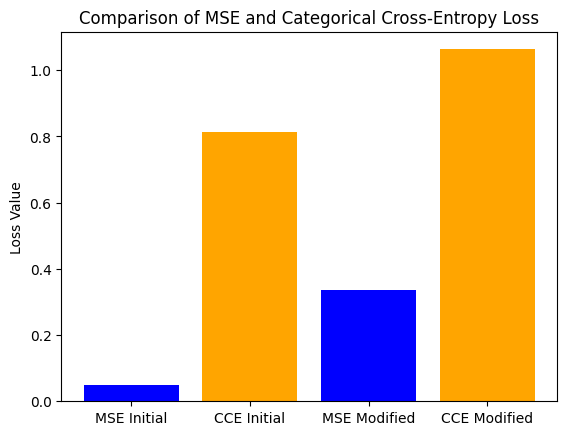

In [41]:


# Step 1: Define true values (y_true) and model predictions (y_pred)
y_true = np.array([0, 1, 0, 1])  # Example true labels (binary classification)
y_pred = np.array([0.1, 0.9, 0.3, 0.7])  # Initial model predictions

# Step 2: Compute Mean Squared Error (MSE) and Categorical Cross-Entropy (CCE) losses
mse_loss = mean_squared_error(y_true, y_pred)
categorical_crossentropy_loss = CategoricalCrossentropy(from_logits=True)
y_true_one_hot = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])  # One-hot encoded true labels
y_pred_one_hot = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # One-hot encoded true labels
cce_loss = categorical_crossentropy_loss(y_true_one_hot, y_pred_one_hot).numpy()

# Print initial loss values
print(f"y_true: {y_true}")
print(f"y_pred: {y_pred}")
print(f"Initial MSE Loss: {mse_loss}")
print(f"y_true: {y_true_one_hot}")
print(f"y_pred: {y_pred_one_hot}")
print(f"Initial Categorical Cross-Entropy Loss: {cce_loss}")

# Step 3: Modify predictions slightly and check how loss values change

y_pred_modified = np.array([0.1, 0.4, 0.4, 0.1]) 

y_pred_one_hot_modified = np.array([[0, 1], [0, 1], [0, 1], [1, 0]])   # Slight modification in predictions

# Recompute losses
mse_loss_modified = mean_squared_error(y_true, y_pred_modified)
cce_loss_modified = categorical_crossentropy_loss(y_true_one_hot, y_pred_one_hot_modified).numpy()

# Print modified loss values
print(f"y_true: {y_true}")
print(f"y_pred: {y_pred_modified}")
print(f"Modified MSE Loss: {mse_loss_modified}")
print(f"y_true: {y_true_one_hot}")
print(f"y_pred: {y_pred_one_hot_modified}")
print(f"Modified Categorical Cross-Entropy Loss: {cce_loss_modified}")

# Step 4: Plot loss function values using Matplotlib
loss_values = [mse_loss, cce_loss, mse_loss_modified, cce_loss_modified]
loss_labels = ['MSE Initial', 'CCE Initial', 'MSE Modified', 'CCE Modified']

plt.bar(loss_labels, loss_values, color=['blue', 'orange', 'blue', 'orange'])
plt.title('Comparison of MSE and Categorical Cross-Entropy Loss')
plt.ylabel('Loss Value')
plt.show()

In [54]:
# task 3
(x_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, X_test = x_train / 255.0, X_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)
print(f'input image shape: {tf.shape(x_train)}')
print(f'test image shape: {tf.shape(x_train)}')
print(f'input label shape: {tf.shape(y_train)}')
print(f'test label shape: {tf.shape(y_test)}')

input image shape: [60000    28    28]
test image shape: [60000    28    28]
input label shape: [60000    10]
test label shape: [10000    10]


In [57]:
def create_model(optimizer):
    model = Sequential(
       [ Flatten(input_shape=(28,28)),
        Dense(784, activation='relu'),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')]
    )
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [64]:
model_adam = create_model(tf.keras.optimizers.Adam())
print(model_adam.summary)
history_adam = model_adam.fit(x_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=2)

c:\Users\gadda\Documents\handsOnML\pandas\GENAI\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential_5, built=True>>
Epoch 1/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9450 - loss: 0.1783 - val_accuracy: 0.9686 - val_loss: 0.1043
Epoch 2/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9749 - loss: 0.0806 - val_accuracy: 0.9774 - val_loss: 0.0759
Epoch 3/5
1875/1875 - 15s - 8ms/step - accuracy: 0.9827 - loss: 0.0552 - val_accuracy: 0.9719 - val_loss: 0.0975
Epoch 4/5
1875/1875 - 13s - 7ms/step - accuracy: 0.9869 - loss: 0.0427 - val_accuracy: 0.9794 - val_loss: 0.0813
Epoch 5/5
1875/1875 - 21s - 11ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9761 - val_loss: 0.0913


In [65]:
model_SGD = create_model(tf.keras.optimizers.SGD())
print(model_SGD.summary)
history_sgd = model_SGD.fit(x_train, y_train, epochs=5, validation_data=(X_test, y_test), verbose=2)

<bound method Model.summary of <Sequential name=sequential_6, built=True>>


c:\Users\gadda\Documents\handsOnML\pandas\GENAI\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 - 13s - 7ms/step - accuracy: 0.8650 - loss: 0.5416 - val_accuracy: 0.9167 - val_loss: 0.2882
Epoch 2/5
1875/1875 - 22s - 12ms/step - accuracy: 0.9257 - loss: 0.2656 - val_accuracy: 0.9360 - val_loss: 0.2290
Epoch 3/5
1875/1875 - 14s - 7ms/step - accuracy: 0.9403 - loss: 0.2147 - val_accuracy: 0.9457 - val_loss: 0.1892
Epoch 4/5
1875/1875 - 13s - 7ms/step - accuracy: 0.9487 - loss: 0.1802 - val_accuracy: 0.9523 - val_loss: 0.1676
Epoch 5/5
1875/1875 - 14s - 7ms/step - accuracy: 0.9559 - loss: 0.1556 - val_accuracy: 0.9574 - val_loss: 0.1460


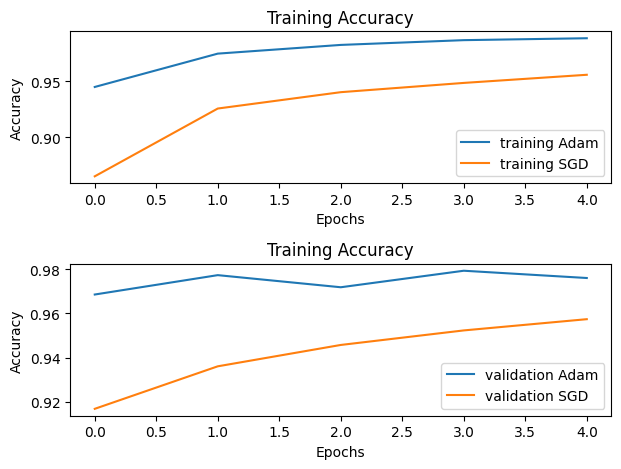

In [68]:
plt.subplot(2,1,1)
plt.plot(history_adam.history['accuracy'], label='training Adam')
plt.plot(history_sgd.history['accuracy'], label='training SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history_adam.history['val_accuracy'], label='validation Adam')
plt.plot(history_sgd.history['val_accuracy'], label='validation SGD')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()